In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install plotly
#!pip install scikit-learn
#!pip install scikit-learn==0.24.2
#!pip install hnswlib
#!pip install annoy
#!pip install seaborn

In [2]:
#!pip install tensorflow

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

In [19]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
#import plotly.express as px
#import plotly.graph_objs as go
from matplotlib import dates as mpl_dates
from matplotlib import pyplot as plt

In [20]:
#model and performance
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report

In [21]:
df = pd.read_csv("3D_Printing_data.csv")

In [22]:
df

,ID,ts,Temp,RelativeHumidity
0,3DPrinter_S5_Env,2024-02-21T11:57:15.000Z,21.6875,31.490845
1,3DPrinter_S5_Env,2024-02-21T11:57:20.000Z,21.6875,31.490845
2,3DPrinter_S5_Env,2024-02-21T11:57:25.000Z,21.7500,31.475586
3,3DPrinter_S5_Env,2024-02-21T11:57:30.000Z,21.6875,31.475586
4,3DPrinter_S5_Env,2024-02-21T11:57:35.000Z,21.6875,31.475586
...,...,...,...,...
1075376,3DPrinter_S5_Env,2024-04-13T20:59:21.000Z,25.8750,28.782410
1075377,3DPrinter_S5_Env,2024-04-13T20:59:26.000Z,25.8750,28.790039
1075378,3DPrinter_S5_Env,2024-04-13T20:59:31.000Z,25.8750,28.805298
1075379,3DPrinter_S5_Env,2024-04-13T20:59:36.000Z,25.9375,28.820557


In [23]:
df.describe()

,Temp,RelativeHumidity
count,1.007983e+06,1.075381e+06
mean,2.020231e+01,3.023567e+01
std,3.251303e+00,3.392731e+00
min,1.087500e+01,1.861243e+01
25%,1.856250e+01,2.808051e+01
50%,2.037500e+01,3.010992e+01
75%,2.218750e+01,3.225378e+01
max,3.293750e+01,4.845099e+01


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075381 entries, 0 to 1075380
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1075381 non-null  object 
 1   ts                1075381 non-null  object 
 2   Temp              1007983 non-null  float64
 3   RelativeHumidity  1075381 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.8+ MB


In [25]:
df.isna().sum()

ID                      0
ts                      0
Temp                67398
RelativeHumidity        0
dtype: int64

In [26]:
df.rename(columns={'ts': 'time'}, inplace=True)
df.rename(columns={'Temp': 'Temperature'}, inplace=True)

In [27]:
df = df.sort_values(by='time', ascending=True)

df = df.head(600000)

df = df.reset_index(drop=True)

In [28]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.tz_localize(None)
df = df.drop(columns=['ID'],axis=1)

In [29]:
df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.1250,48.450989
1,2024-02-16 17:44:35,21.2500,46.909851
2,2024-02-16 17:44:40,21.2500,45.925659
3,2024-02-16 17:44:45,21.2500,45.559448
4,2024-02-16 17:44:50,21.2500,45.177979
...,...,...,...
599995,2024-03-22 11:25:44,24.6250,23.617310
599996,2024-03-22 11:25:49,24.5625,23.609680
599997,2024-03-22 11:25:54,24.5625,23.609680
599998,2024-03-22 11:25:59,24.5625,23.632568


In [30]:
df['Temperature'] = round(df['Temperature'], 2)
df['RelativeHumidity'] = round(df['RelativeHumidity'], 2)

In [31]:
filled_df = df
new_df1 = filled_df

In [32]:
new_df = new_df1
new_df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.12,48.45
1,2024-02-16 17:44:35,21.25,46.91
2,2024-02-16 17:44:40,21.25,45.93
3,2024-02-16 17:44:45,21.25,45.56
4,2024-02-16 17:44:50,21.25,45.18
...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62
599996,2024-03-22 11:25:49,24.56,23.61
599997,2024-03-22 11:25:54,24.56,23.61
599998,2024-03-22 11:25:59,24.56,23.63


# MISSING DATA IMPUTATION

In [33]:
new_df['Temperature'].interpolate(method='linear', inplace=True)

print(new_df)

new_df.isna().sum()

                      time  Temperature  RelativeHumidity
0      2024-02-16 17:44:30        21.12             48.45
1      2024-02-16 17:44:35        21.25             46.91
2      2024-02-16 17:44:40        21.25             45.93
3      2024-02-16 17:44:45        21.25             45.56
4      2024-02-16 17:44:50        21.25             45.18
...                    ...          ...               ...
599995 2024-03-22 11:25:44        24.62             23.62
599996 2024-03-22 11:25:49        24.56             23.61
599997 2024-03-22 11:25:54        24.56             23.61
599998 2024-03-22 11:25:59        24.56             23.63
599999 2024-03-22 11:26:04        24.56             23.63

[600000 rows x 3 columns]


time                0
Temperature         0
RelativeHumidity    0
dtype: int64

# TIME SERIES PLOT OF THE RAW DATA

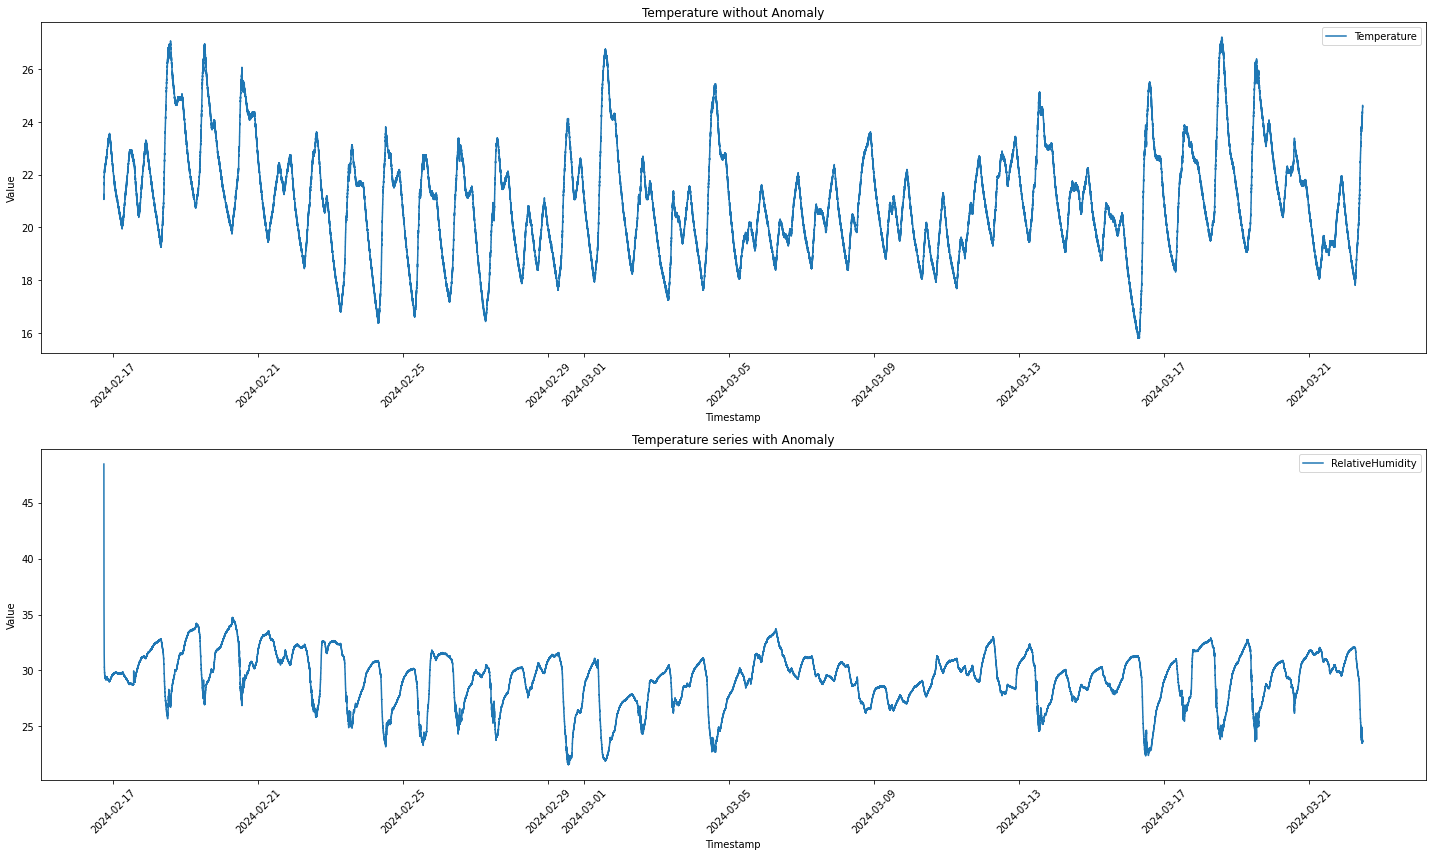

In [34]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temperature'], label='Temperature')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Temperature without Anomaly')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RelativeHumidity'], label='RelativeHumidity')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Temperature series with Anomaly')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


# CORRELATION ANALYSIS

In [35]:
correlation = new_df['Temperature'].corr(new_df['RelativeHumidity'])

print("Correlation between Temperature and RelativeHumidity:", correlation)

Correlation between Temperature and RelativeHumidity: -0.5193350918167688


#  INJECT ARTIFICIAL OUTLIERS TO TEMPERATURE DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [36]:
new_df['Temp_anomaly'] = new_df['Temperature']

new_df['anomaly_time'] = pd.to_datetime(new_df['time'])


specific_dates1 = ['2024-03-13', '2024-03-03', '2024-02-19']
specific_dates2 = ['2024-02-21', '2024-02-25', '2024-03-07']
specific_dates3 = ['2024-02-23', '2024-02-26', '2024-03-09']
specific_dates4 = ['2024-02-29', '2024-03-05']


# Create the condition mask
mask1 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates1)) & (new_df['Temperature'].between(22.3, 22.45))
mask2 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates2)) & (new_df['Temperature'].between(20.4, 20.5))
mask3 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates3)) & (new_df['Temperature'].between(21.3, 21.4))
mask4 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates4)) & (new_df['Temperature'].between(21.5, 21.7))


# Apply the replacement
new_df.loc[mask1, 'Temp_anomaly'] = 33.885
new_df.loc[mask2, 'Temp_anomaly'] = 32.885
new_df.loc[mask3, 'Temp_anomaly'] = 24.885
new_df.loc[mask4, 'Temp_anomaly'] = 17.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50
...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59


# INJECT ARTIFICIAL OUTLIERS TO HUMIDITY DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [37]:
new_df['RH_anomaly'] = new_df['RelativeHumidity']

specific_dates5 = ['2024-02-27', '2024-02-22']
specific_dates6 = ['2024-03-04']
specific_dates7 = ['2024-02-22', '2024-02-24', '2024-03-13', '2024-03-17']
specific_dates8 = ['2024-03-16']

# Create the condition mask
mask5 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates5)) & (new_df['RelativeHumidity'].between(29.1, 29.5))
mask6 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates6)) & (new_df['RelativeHumidity'].between(26.7, 27.2))
mask7 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates7)) & (new_df['RelativeHumidity'].between(26.8, 27.0))
mask8 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates8)) & (new_df['RelativeHumidity'].between(30.2, 30.5))


# Apply the replacement
new_df.loc[mask5, 'RH_anomaly'] = 40.885
new_df.loc[mask6, 'RH_anomaly'] = 36.885
new_df.loc[mask7, 'RH_anomaly'] = 29.885
new_df.loc[mask8, 'RH_anomaly'] = 25.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18
...,...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44,23.62
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49,23.61
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54,23.61
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59,23.63


In [38]:
# Label the artificial outliers as -1 while normal data points are 1

def replacevalues(val):
  if val in [33.885, 32.885, 24.885, 17.885]:
    return -1
  else:
    return 1

new_df['Temp_anomaly_labels'] = new_df['Temp_anomaly'].apply(replacevalues)


def replacevalues(val):
  if val in [40.885, 36.885, 29.885, 25.885]:
    return -1
  else:
    return 1

new_df['RH_anomaly_labels'] = new_df['RH_anomaly'].apply(replacevalues)

In [39]:
new_df['RH_anomaly_labels'].value_counts()

RH_anomaly_labels
 1    595197
-1      4803
Name: count, dtype: int64

In [40]:
new_df['Temp_anomaly_labels'].value_counts()

Temp_anomaly_labels
 1    593498
-1      6502
Name: count, dtype: int64

# TEMPERATURE AND HUMIDITY TIME SERIES WITH INJECTED ANOMALIES 

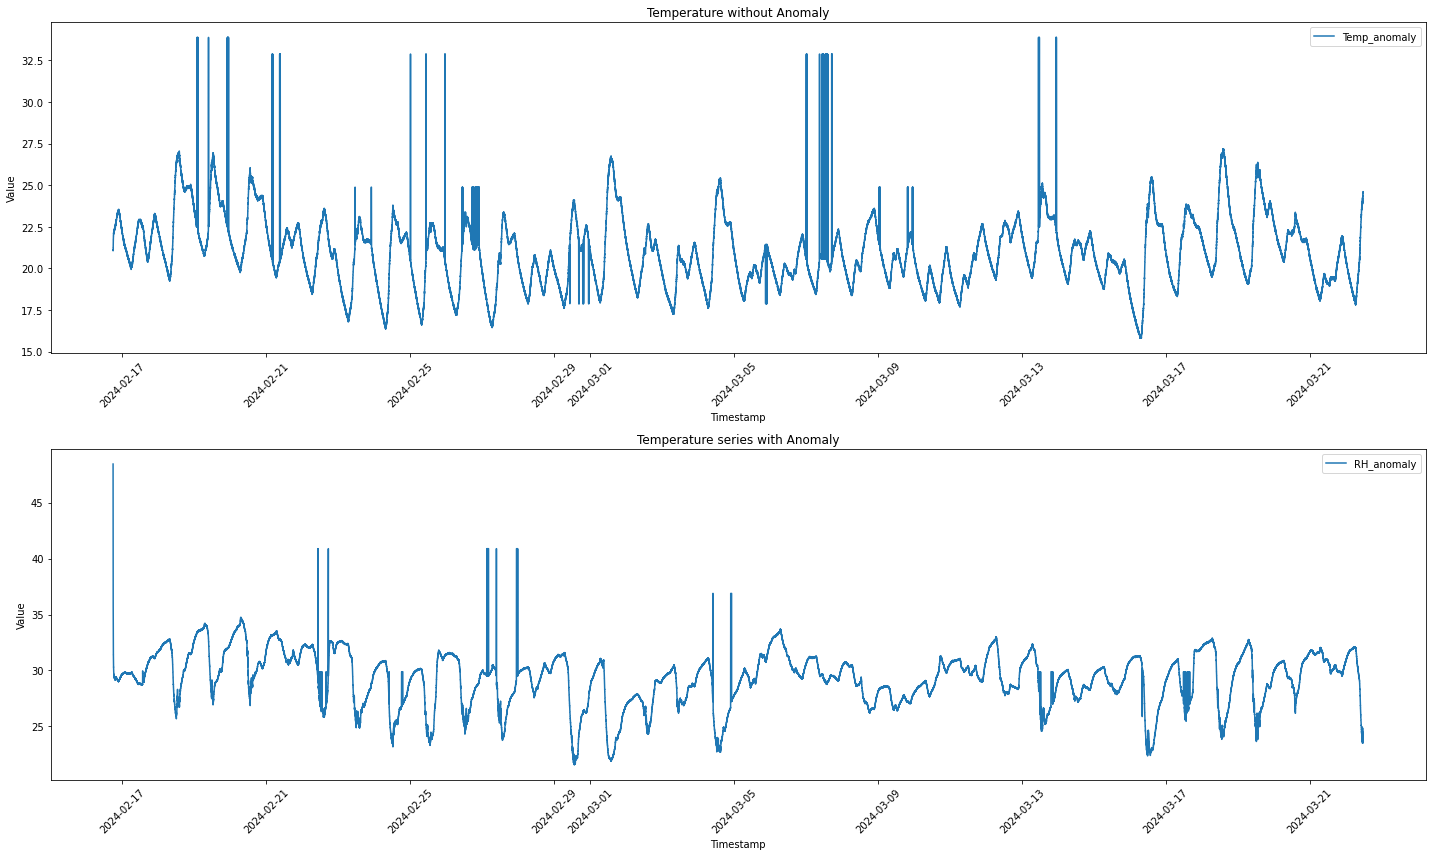

In [41]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(new_df['time'], new_df['Temp_anomaly'], label='Temp_anomaly')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Temperature without Anomaly')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RH_anomaly'], label='RH_anomaly')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Temperature series with Anomaly')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [42]:
clean_df = new_df

# TIME SERIES DECOMPOSITION USING STL PROCEDURE

In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox


#  Decompose to check temperature components
decomposition1 = seasonal_decompose(clean_df['Temp_anomaly'], model='additive', period=2300)
clean_df['Temp_Trend'] = decomposition1.trend
clean_df['Temp_Seasonality'] = decomposition1.seasonal
clean_df['Temp_Residual'] = decomposition1.resid

# Stationary temperature Series after removing trend and seasonality
clean_df['Temp_Stationary'] = clean_df['Temp_anomaly'] - (clean_df['Temp_Trend'] - clean_df['Temp_Seasonality'])
clean_df = clean_df.drop(columns=['Temp_Trend','Temp_Seasonality','Temp_Residual'], axis=1)

# Decompose to check humidity components
decomposition2 = seasonal_decompose(clean_df['RH_anomaly'], model='additive', period=2300)
clean_df['RH_Trend'] = decomposition2.trend
clean_df['RH_Seasonality'] = decomposition2.seasonal
clean_df['RH_Residual'] = decomposition2.resid

# Stationary humidity Series after removing trend and seasonality
clean_df['RH_Stationary'] = clean_df['RH_anomaly'] - clean_df['RH_Trend'] - clean_df['RH_Seasonality']
clean_df = clean_df.drop(columns=['RH_Trend','RH_Seasonality','RH_Residual'], axis=1)

In [44]:
clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])

# RESIDUAL PLOT OF THE TEMPERATURE AND HUMIDITY TIME SERIES

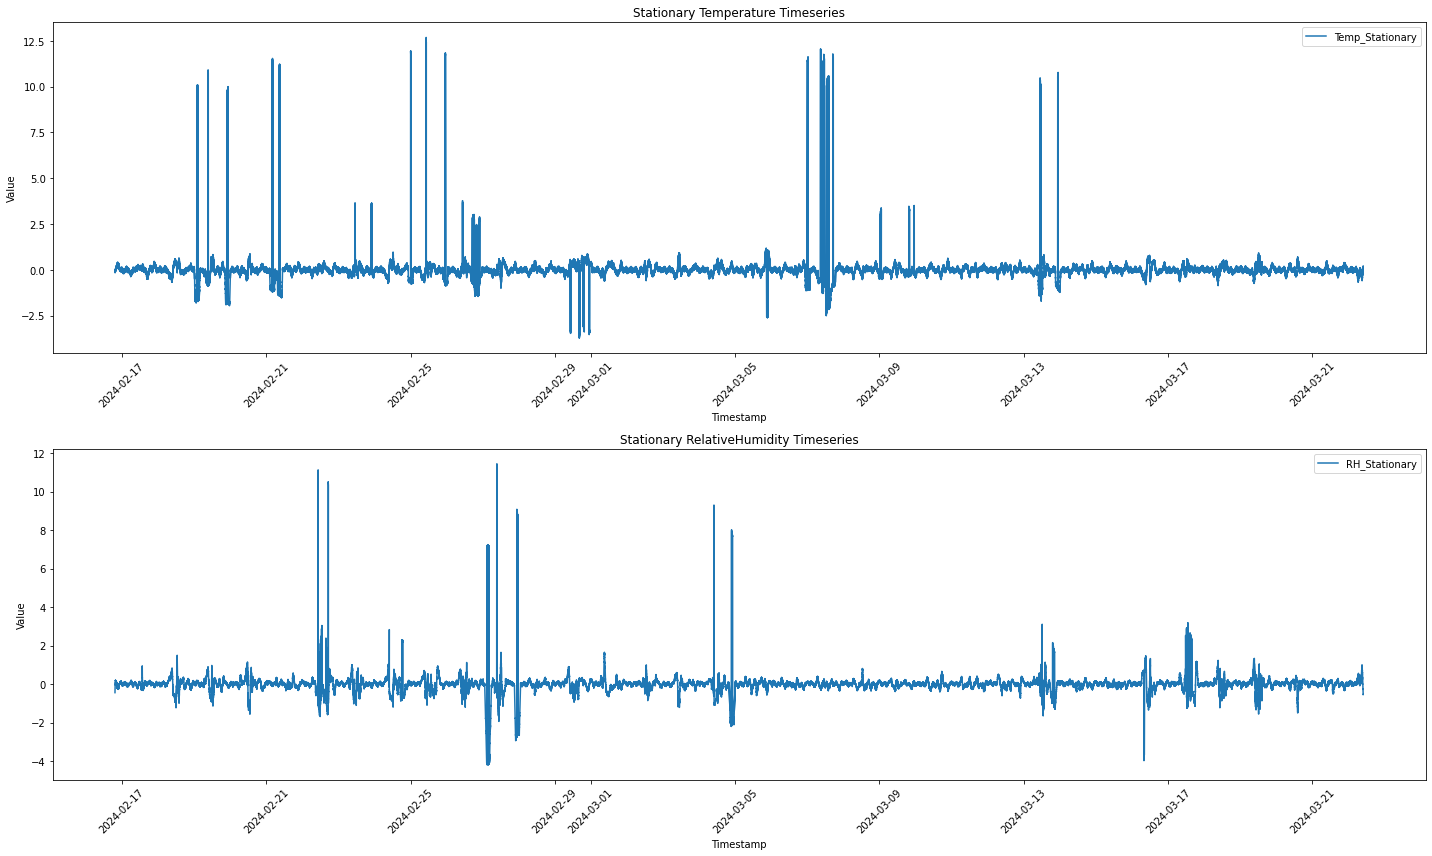

In [45]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(20, 12))

# Plot Temp and RelativeHumidity on the first subplot
axs[0].plot(clean_df['time'], clean_df['Temp_Stationary'], label='Temp_Stationary')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Value')
axs[0].set_title('Stationary Temperature Timeseries')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot Temp and RelativeHumidity on the first subplot
axs[1].plot(clean_df['time'], clean_df['RH_Stationary'], label='RH_Stationary')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Value')
axs[1].set_title('Stationary RelativeHumidity Timeseries')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [46]:
X = abs(clean_df['Temp_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.274440, mean2=0.236448
variance1=0.680129, variance2=0.619927


In [47]:
X = abs(clean_df['RH_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.304983, mean2=0.159661
variance1=0.682180, variance2=0.061617


In [43]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])

adf_result1 = adfuller(clean_df['Temp_Stationary'])
adf_result2 = adfuller(clean_df['RH_Stationary'])


# Print the ADF test results
#print(f"ADF Statistic: {adf_result1[0]}")
print(f"p-value: {adf_result1[1]}")

print(f"p-value: {adf_result2[1]}")

KeyboardInterrupt: 

In [48]:
clean_df['Temp_Stationary'] = abs(clean_df['Temp_Stationary'])
clean_df['RH_Stationary'] = abs(clean_df['RH_Stationary'])

clean_df['Temp_RH_stationary'] = abs(clean_df['Temp_Stationary'] - clean_df['RH_Stationary'])

clean_df['var_Temp_anomaly'] = clean_df['Temp_Stationary'].var(ddof=0)
clean_df['var_RH_anomaly'] = clean_df['RH_Stationary'].var(ddof=0)

In [49]:
clean_df['Temp_RH_Anomaly_Labels'] = clean_df.apply(lambda row: 1 if (row['Temp_anomaly_labels'] == 1 and row['RH_anomaly_labels'] == 1) else -1, axis=1)

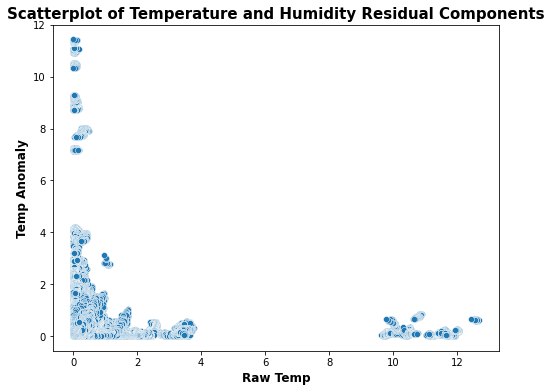

In [52]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x='Temp_Stationary', y='RH_Stationary')
plt.title('Scatterplot of Temperature and Humidity Residual Components', weight='bold', fontsize=15)
plt.ylabel('Temp Anomaly', weight='bold', fontsize=12)
plt.xlabel('Raw Temp', weight='bold', fontsize=12)
plt.show()

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [73]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# MODEL BUILDING, EVALUATION AND TESTING WITH K-means

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labelled_data = clean_df[['time', 'Temp_RH_Anomaly_Labels', 'Temp_RH_stationary']]

In [75]:
labelled_data

,time,Temp_RH_Anomaly_Labels,Temp_RH_stationary
1150,2024-02-16 19:20:21,1,0.409033
1151,2024-02-16 19:20:26,1,0.337437
1152,2024-02-16 19:20:31,1,0.397405
1153,2024-02-16 19:20:36,1,0.315569
1154,2024-02-16 19:20:41,1,0.370944
...,...,...,...
598845,2024-03-22 09:49:52,1,0.336423
598846,2024-03-22 09:49:57,1,0.317946
598847,2024-03-22 09:50:02,1,0.351878
598848,2024-03-22 09:50:07,1,0.348379


# NORMALIZATION

In [76]:
val_min = labelled_data['Temp_RH_stationary'].min()
val_max = labelled_data['Temp_RH_stationary'].max()

# Feature scaling
labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))

<ipython-input-76-181fca226024>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))


In [77]:
labelled_data_LSTM1 = labelled_data[['time', 'Temp_RH_diff_scaled','Temp_RH_Anomaly_Labels']]

# TRAIN TEST SPLIT 

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score  # Adjusted for continuous labels

train_size = int(len(labelled_data_LSTM1) * 0.7)
val_size = len(labelled_data_LSTM1) - train_size  # The remaining 30% will be validation

# Split the dataframe into train and validation sets
X_train = labelled_data_LSTM1.iloc[:train_size]
X_val_test = labelled_data_LSTM1.iloc[train_size:]

# Determine split indices for train / test split
#split_index = int(len(labelled_data_LSTM1) * 0.7)  # 60% for training, 40% for validation

# Split normal data for training/validation
#X_train = labelled_data_LSTM1.iloc[:train_size]
#X_val = labelled_data_LSTM1.iloc[train_size:]

#split_index_val = int(len(X_val) * 1)

#X_val_test = X_val[:split_index_val]
#X_val_test_unseen = X_val[split_index_val:]

print(X_train.shape, X_val_test.shape)



(418390, 3) (179310, 3)


# HYPER PARAMETER TUNING OF K-MEANS MODEL

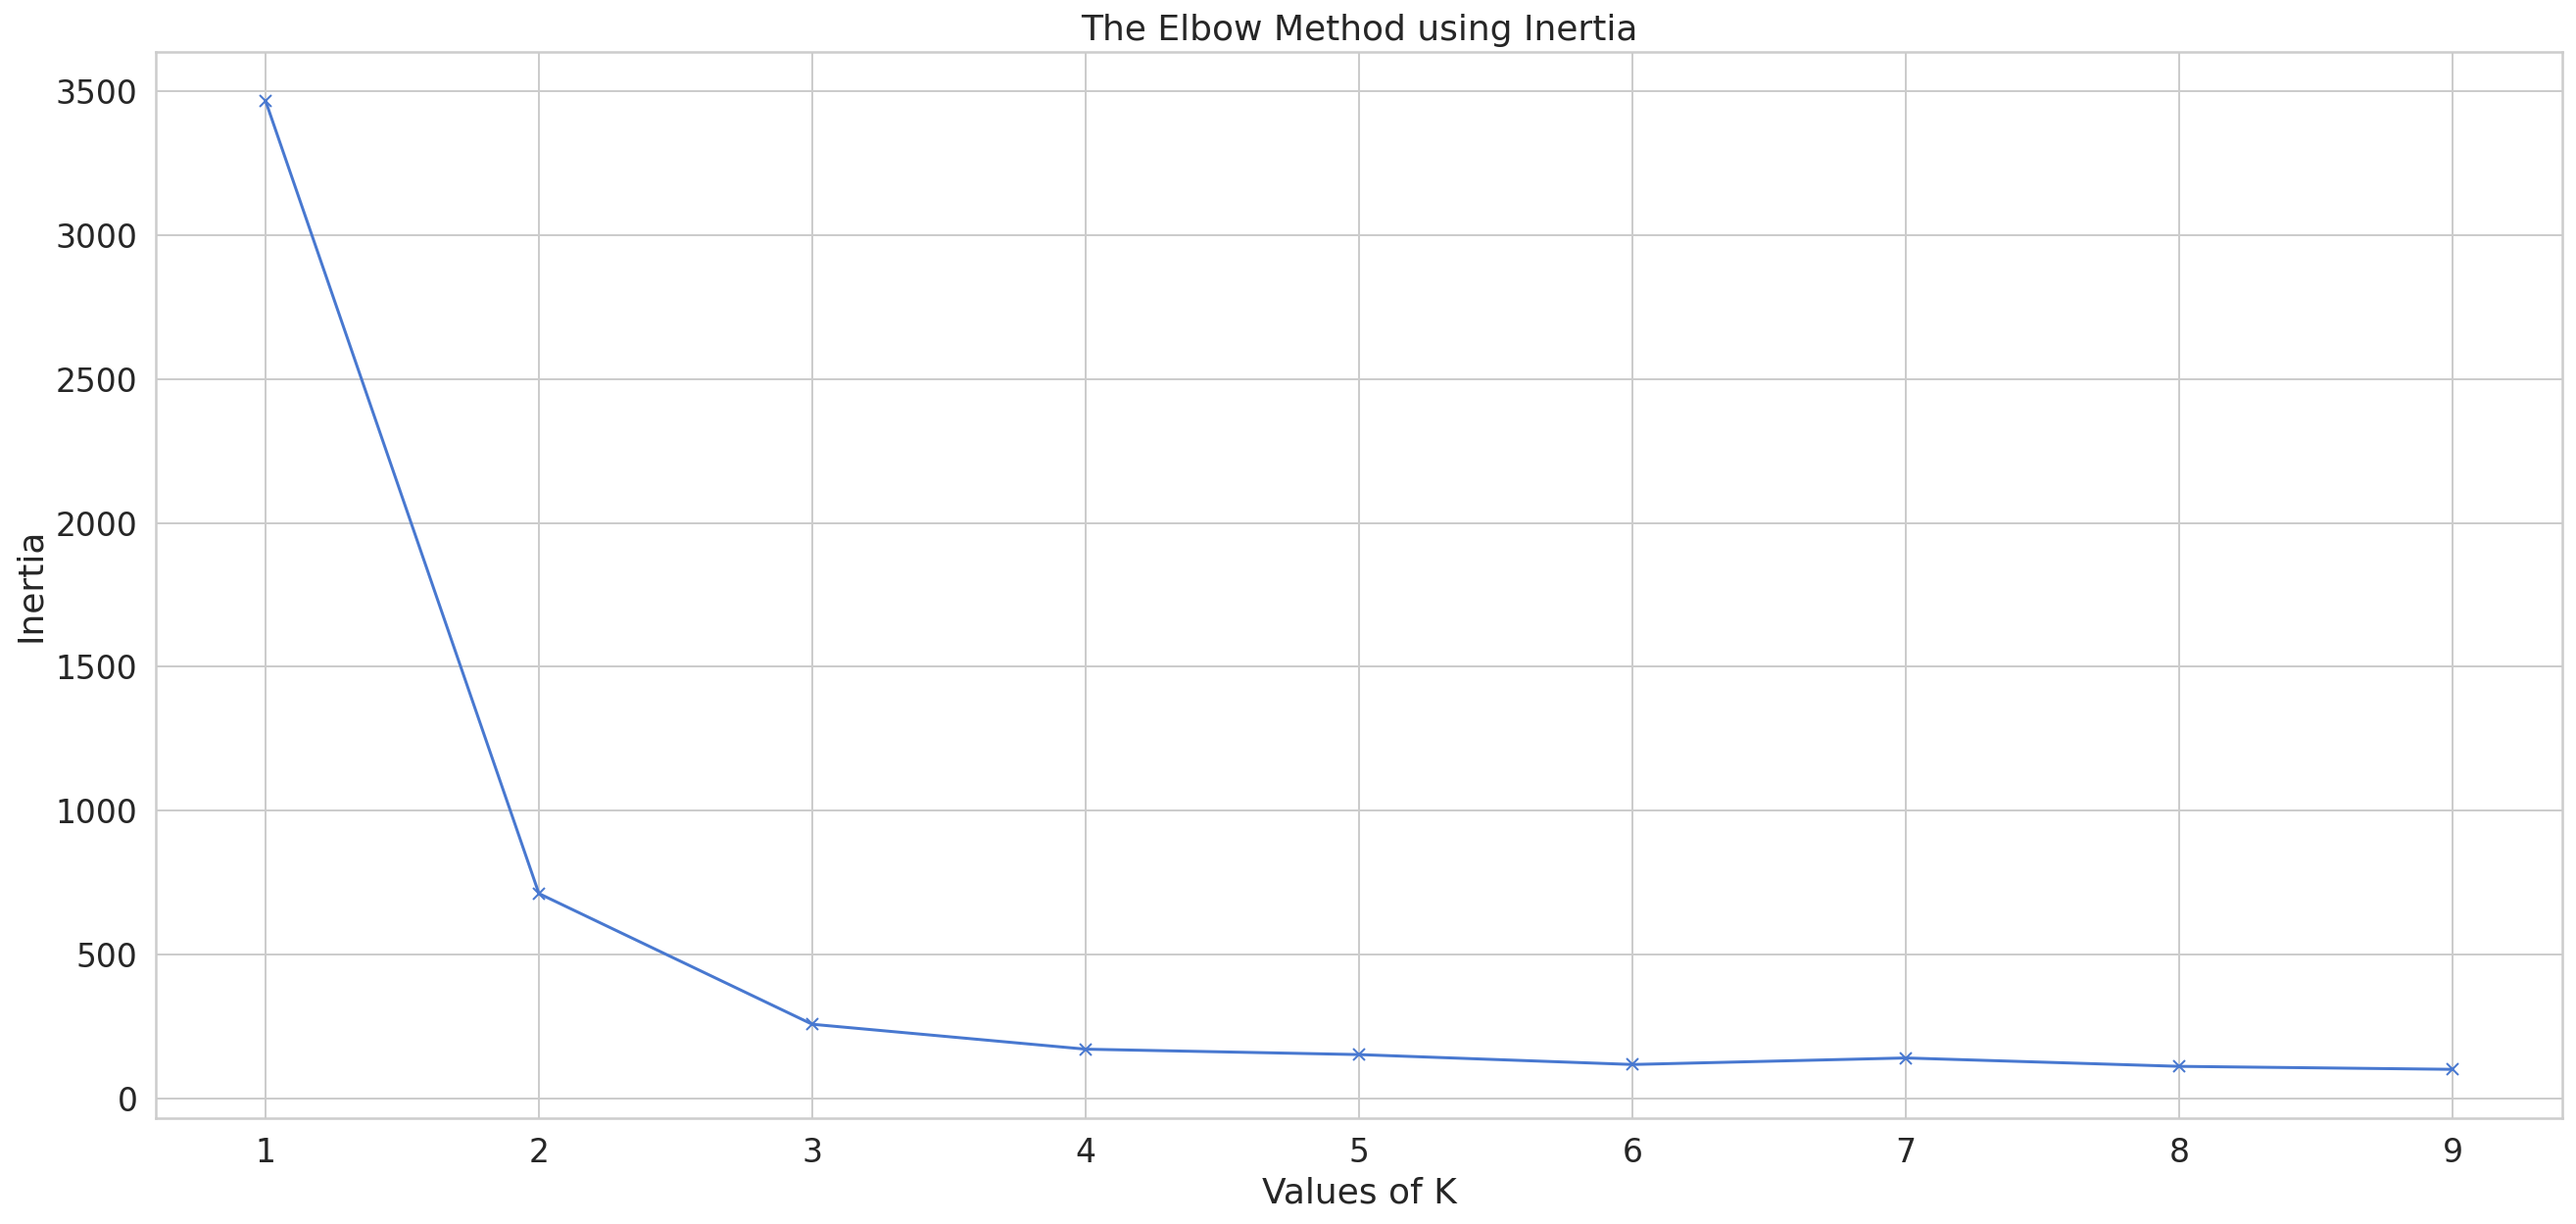

In [79]:
from sklearn.cluster import MiniBatchKMeans  # Import MiniBatchKMeans for clustering

inertia = []
range_val = range(1, 10)
for i in range_val:
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=200, batch_size=128, n_init=12, random_state=32
                            )
    kmeans.fit(X_train[['Temp_RH_diff_scaled']])
    inertia.append(kmeans.inertia_)

plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# MODEL TESTING

In [80]:
optimal_k = 2  # Replace with the optimal K found from the elbow plot
kmeans = MiniBatchKMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, batch_size=128,
                         n_init=12,
                         random_state=32)

In [81]:
import time

# Start the timer
start_time = time.time()

predicted_labels = kmeans.fit_predict(X_val_test[['Temp_RH_diff_scaled']])

# End the timer
end_time = time.time()

# Calculate the time taken
execution_time = end_time - start_time
print(f"Time taken to run the validation data: {execution_time} seconds")

Time taken to run the validation data: 0.12423372268676758 seconds


In [82]:
X_val_test = X_val_test.reset_index(drop=True)
df_kmeans= pd.concat([X_val_test[['Temp_RH_diff_scaled','Temp_RH_Anomaly_Labels']],pd.DataFrame({'predicted labels':predicted_labels})], axis=1)
df_kmeans['Temp_RH_Anomaly_Labels'] = df_kmeans['Temp_RH_Anomaly_Labels'].apply(lambda x: 0 if x == 1 else (1 if x == -1 else x))

df_kmeans

,Temp_RH_diff_scaled,Temp_RH_Anomaly_Labels,predicted labels
0,0.005059,0,0
1,0.006693,0,0
2,0.005578,0,0
3,0.005728,0,0
4,0.005566,0,0
...,...,...,...
179305,0.027820,0,0
179306,0.026292,0,0
179307,0.029098,0,0
179308,0.028808,0,0


# TESTING RESULTS

In [83]:
# PREDICTED LABELS
df_kmeans['predicted labels'].value_counts()

predicted labels
0    177891
1      1419
Name: count, dtype: int64

In [84]:
# GROUND TRUTH LABELS
df_kmeans['Temp_RH_Anomaly_Labels'].value_counts()

Temp_RH_Anomaly_Labels
0    177387
1      1923
Name: count, dtype: int64

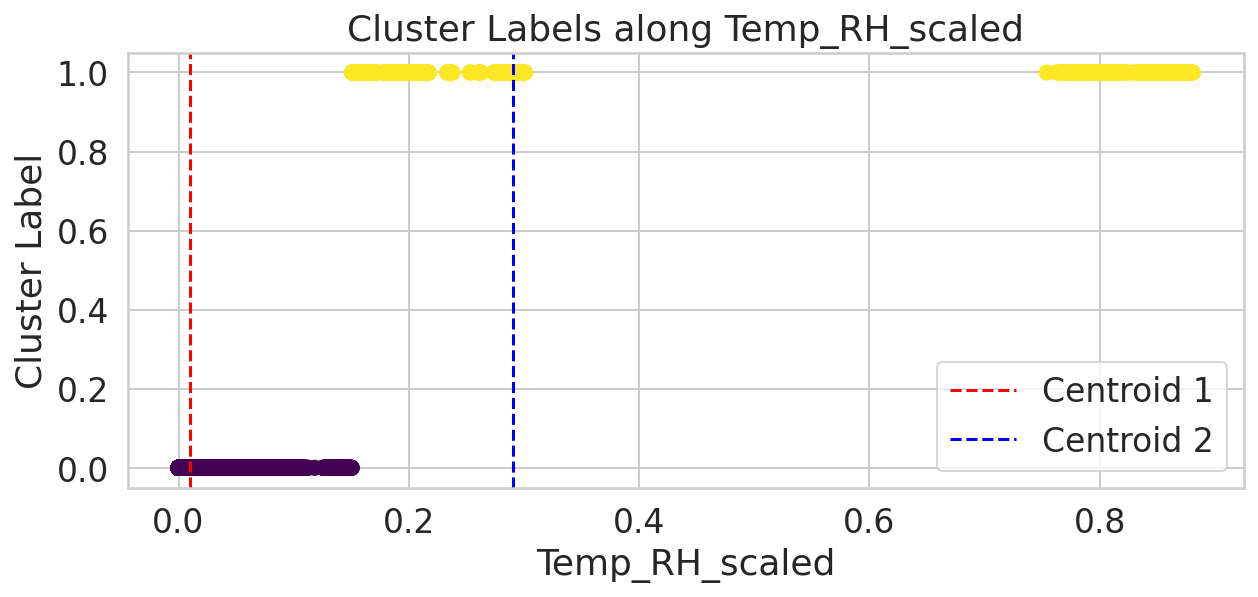

In [85]:
# 1D Plotting: Visualizing clusters along Temp_RH_scaled feature
plt.figure(figsize=(10, 4))
plt.scatter(X_val_test[['Temp_RH_diff_scaled']], predicted_labels, c=predicted_labels, cmap='viridis', s=50)
plt.axvline(x=kmeans.cluster_centers_[0], color='red', linestyle='--', label='Centroid 1')
plt.axvline(x=kmeans.cluster_centers_[1], color='blue', linestyle='--', label='Centroid 2')

plt.xlabel('Temp_RH_scaled')
plt.ylabel('Cluster Label')
plt.title('Cluster Labels along Temp_RH_scaled')
plt.legend()
plt.grid(True)
plt.show()

# EVALUATION METRICS IN DETECTING ANOMALIES

In [86]:
precision = precision_score(df_kmeans['Temp_RH_Anomaly_Labels'], df_kmeans['predicted labels'], pos_label=1)
recall = recall_score(df_kmeans['Temp_RH_Anomaly_Labels'], df_kmeans['predicted labels'], pos_label=1)
f1 = f1_score(df_kmeans['Temp_RH_Anomaly_Labels'], df_kmeans['predicted labels'], pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

#conf_matrix = confusion_matrix(merged_df['Temp_anomaly_labels'], merged_df['anomaly'])

Precision: 1.0
Recall: 0.7379095163806553
F1-Score: 0.8491921005385997


# CONFUSION MATRIX

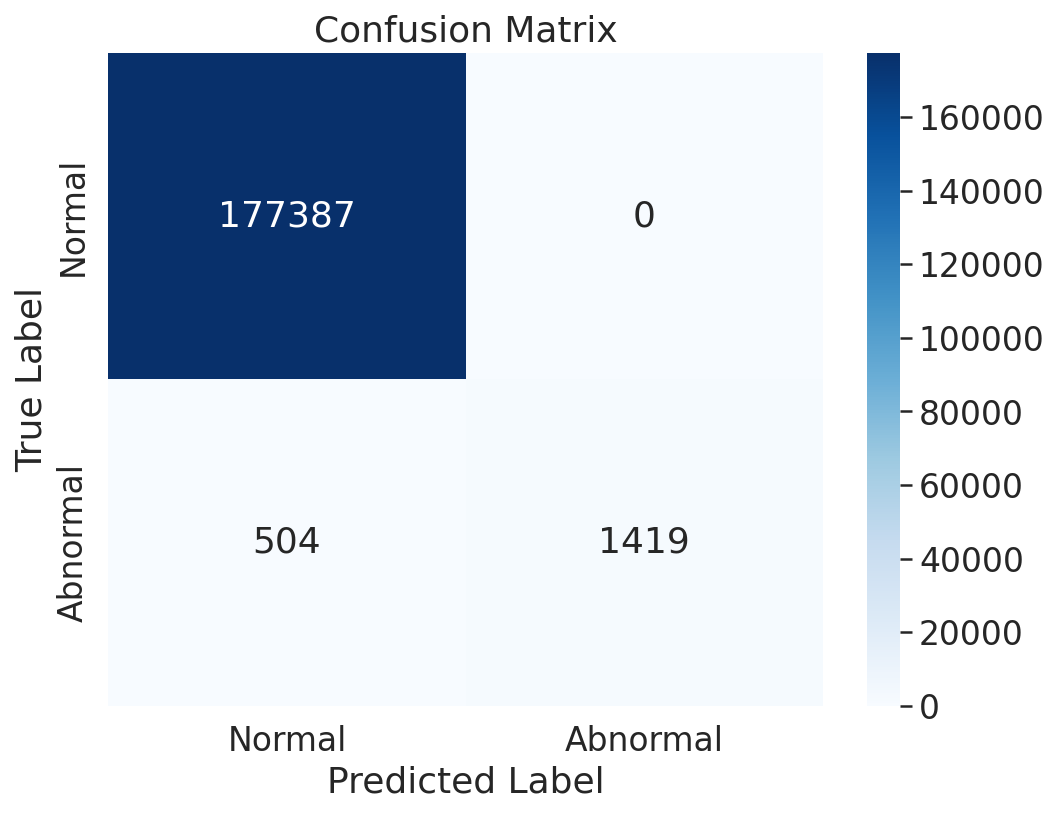

In [2588]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(df_kmeans['Temp_RH_Anomaly_Labels'], df_kmeans['predicted labels'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal','Abnormal'], yticklabels=['Normal','Abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
